In [1]:
import json
import requests
import networkx as nx

%matplotlib inline

In [2]:
# from https://madnight.github.io/githut/#/pull_requests/2024/1
POPULAR_LANGUAGES = [
    # Top 10
    'Python', 'Java', 'Go', 'JavaScript', 'C++',
    #'TypeScript',
    'PHP', 'Ruby', 'C', 'C#',
    # Top 20
    'Nix', 'Shell', 'Rust', 'Scala', 'Kotlin',
    'Swift', 'Dart', 'Groovy', 'Perl', 'Lua',
    # Top 30
    'DM', 'SystemVerilog', 'Objective-C', 'Elixir', 'CodeQL',
    'OCaml', 'Haskell', 'PowerShell', 'Erlang', 'Emacs Lisp',
    # Top 33
    'Julia', 'Clojure', 'R'
]


NOTABLE_LANGUAGES = [
    # in 1950s
    'FORTRAN', 'LISP', 'ALGOL', 'COBOL',
    # in 1960s
    'Simula', 'Speakeasy', 'BASIC',
    # in 1970s
    'Pascal', 'C', 'Smalltalk', 'Prolog', 'ML', 'Scheme', 'SQL',
    # in 1980s
    'C++', 'Ada', 'Perl', 
    # in 1990s
    'Haskell', 'Python', 'Visual Basic', 'Lua', 'R', 
    'Ruby', 'Java', 'JavaScript', 'PHP', 'OCaml',
    # in 2000s
    'C#', 'Go',
    # in 2010s
    'Dart', 'Kotlin', 'Julia', 'TypeScript', 'Swift', 'Rust'
]

CHOSEN_LANGUAGES = [
    # in 1950s
    'FORTRAN', 'LISP', 'ALGOL', 'COBOL',
    # in 1960s
    'BASIC', 'PL/I'
    # in 1970s
    'Pascal', 'C', 'Scheme', 'Smalltalk', 'Prolog',
    # in 1980s
    'C++', 'Perl', 'Ada', 'Erlang',
    # in 1990s
    'Haskell', 'Python', 'Visual Basic',
    'Java', 'JavaScript', 'Ruby', 
    # in 2000s
    'C#', #'Go',
]

In [3]:
try:
    res = requests.get('https://exploring-data.com/gexf/plin_forceatlas2.json')
    d = json.loads(res.text)
except:
    import os
    if not os.path.exists('plin_forceatlas2.json'):
        # Exploring Dataのサイトで使用されているデータを取得
        # URL: https://exploring-data.com/vis/programming-languages-influence-network/
        !wget -P data https://exploring-data.com/gexf/plin_forceatlas2.json

    with open('data/plin_forceatlas2.json') as f:
        d = json.load(f)

In [4]:
G = nx.DiGraph()

id2name = {}
for node in d['nodes']:
    if 'paradigms' in node['attributes']:
        id = node['id']
        node_name = node['label']
        id2name[id] = node_name
        paradigms = node['attributes']['paradigms'].split('|')
        G.add_node(node_name, paradigm=paradigms)


edges = []
for edge in d['edges']:
    if edge['sourceID'] in id2name and edge['targetID'] in id2name:
        source = id2name[edge['sourceID']]
        target = id2name[edge['targetID']]
        # source が target に影響を与えた（i.e. targetはsourceに影響を受けた言語）
        edges.append((source, target))
        
G.add_edges_from(edges)

In [5]:
G_sub = G.subgraph(POPULAR_LANGUAGES[:8])
G_sub = G.subgraph(CHOSEN_LANGUAGES)

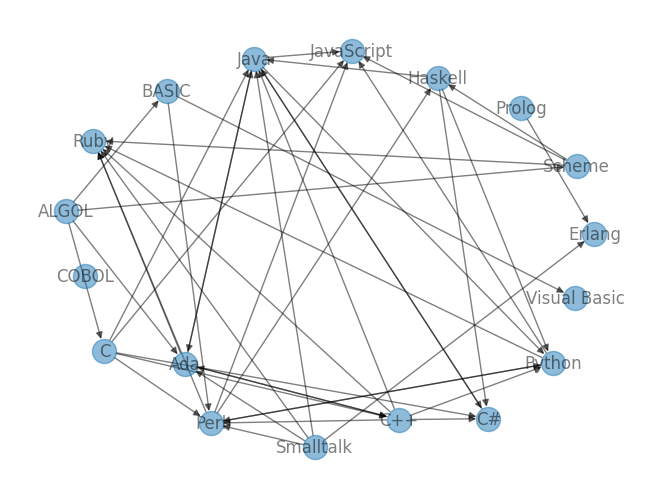

In [6]:
pos = nx.spring_layout(G_sub, k=8.0)
nx.draw(G_sub, pos, with_labels=True, alpha=0.5) 

In [7]:
h, a = nx.hits(G_sub, max_iter=1000)
sorted(h.items(), key=lambda x: -x[1])[:30]

[('C++', 0.1644787726763753),
 ('Smalltalk', 0.12309984399042047),
 ('C', 0.12170060112362677),
 ('Java', 0.09556338696596214),
 ('Perl', 0.08954569159865634),
 ('Python', 0.08626168437063046),
 ('Haskell', 0.08090665231588313),
 ('Ada', 0.07603741375196246),
 ('Scheme', 0.06619870952917233),
 ('C#', 0.03246883293620314),
 ('BASIC', 0.030144263410876747),
 ('ALGOL', 0.026535256636505546),
 ('Prolog', 0.007058890693725168),
 ('Ruby', -0.0),
 ('COBOL', -0.0),
 ('Erlang', -0.0),
 ('JavaScript', -0.0),
 ('Visual Basic', -0.0)]

In [8]:
sorted(a.items(), key=lambda x: -x[1])[:30]

[('Ruby', 0.1482376230526495),
 ('Java', 0.14654137291462901),
 ('Perl', 0.12867152201072046),
 ('C#', 0.1132423131511447),
 ('JavaScript', 0.11241515502583412),
 ('Python', 0.10537178261373922),
 ('Ada', 0.10027636323858818),
 ('C++', 0.04840016991108936),
 ('Haskell', 0.03812142790060111),
 ('Erlang', 0.03185884554413392),
 ('Visual Basic', 0.007378386355547365),
 ('Scheme', 0.006495012760441033),
 ('BASIC', 0.006495012760441033),
 ('C', 0.006495012760441033),
 ('ALGOL', -0.0),
 ('COBOL', -0.0),
 ('Smalltalk', -0.0),
 ('Prolog', -0.0)]

In [9]:
reversed_G = G_sub.reverse()
pr = nx.pagerank(reversed_G, alpha=0.75)
sorted(pr.items(), key=lambda x: -x[1])[:20]

[('ALGOL', 0.1824916985242153),
 ('C', 0.0815819440618317),
 ('C++', 0.07370004280500529),
 ('Smalltalk', 0.0692299550814309),
 ('Ada', 0.06532062673188216),
 ('Perl', 0.0610225490605169),
 ('Java', 0.057976201421171554),
 ('BASIC', 0.05649892940034689),
 ('Scheme', 0.05283857385804718),
 ('Haskell', 0.048917059981207725),
 ('Python', 0.043647951026363256),
 ('Prolog', 0.03720009187434329),
 ('C#', 0.034301463015014674),
 ('Ruby', 0.027054582631724628),
 ('COBOL', 0.027054582631724628),
 ('Erlang', 0.027054582631724628),
 ('JavaScript', 0.027054582631724628),
 ('Visual Basic', 0.027054582631724628)]

In [10]:
from gensim.models import Word2Vec
import numpy as np

def cosine_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [11]:
import random

# nx.generate_random_paths(G, sample_size=10, path_length=5) と同じ
def generate_random_paths(G, sample_size=10, path_length=5):
    _G = G.to_undirected()
    nodes = list(_G.nodes)
    paths = []

    for i in range(sample_size):
        node = random.choice(nodes)
        path = [node]
        
        for j in range(path_length):
            neighbors = _G.neighbors(node)
            neighbor = random.choice(list(neighbors))
            path.append(neighbor)
            node = neighbor
        else:
            paths.append(path)

    return paths

In [37]:
G.remove_nodes_from(list(nx.isolates(G)))
#paths = generate_random_paths(G_sub)
paths = list(nx.generate_random_paths(G.to_undirected(), sample_size=100000, path_length=10))



In [58]:
# 学習
model = Word2Vec(paths, vector_size=512, window=5, min_count=30, epochs=5)

In [59]:
cosine_sim(model.wv['Python'], model.wv['Ruby'])

0.31284717

In [60]:
cosine_sim(model.wv['Smalltalk'], model.wv['Objective-C'])

0.15120898

In [61]:
cosine_sim(model.wv['Java'], model.wv['C#'])

0.20247811

In [62]:
cosine_sim(model.wv['Lisp'], model.wv['Scheme'])

0.13757682

In [63]:
cosine_sim(model.wv['Python'], model.wv['R'])

-0.10854513

In [66]:
results = model.wv.most_similar(positive=["JavaScript"], topn=100) #ここで元の単語を指定する
for result in results:
    if result[0] in POPULAR_LANGUAGES:
        print(result)

('Groovy', 0.2062573879957199)
('Perl', 0.1861027330160141)
('C++', 0.17691650986671448)
('Lua', 0.1360611915588379)
('Ruby', 0.12705259025096893)
('Objective-C', 0.11757013201713562)
('Python', 0.09686344116926193)
('PHP', 0.07677168399095535)
('R', 0.07467618584632874)
('Go', 0.0630873590707779)
('C', 0.03195572271943092)
('Haskell', 0.0289512537419796)
('Emacs Lisp', 0.025776470080018044)
